# Data Wrangling project - Rodolfo Yoshii
## The project is divided in 3 main sections: Gather, Assess, Clean 
#### Note: The data cleaning process for each of the issues will be done while assessing 
## A final part is added for insights (at least 3) and visualizations (at least 1)


## Section: Gather
### First we will import the necessary libraries, then we will gather the datasets using various methods depending on the data sources (reading a csv, and tsv and running the Twitter API with tweepy)

In [814]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import os
import requests
import tweepy
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [590]:
# Gathering data files
# First we read the twitter-archive-enhanced.csv file
df = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')

# Import programmatically the file:
request = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [591]:
# Then download the image-predictions.tsv file
folder_name = 'tsv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open (os.path.join(folder_name, url.split('/')[-1]), mode ='wb') as file:
    file.write(request.content)

In [592]:
# The file image-predictions.tsv has been stored in this dataframe df2
df2 = pd.read_csv(url, sep='\t')

In [593]:
# Here I provided my tweeter developer keys. Note I have removed them prior to submitting for privacy.
consumer_key = 'K05tcG40Nx0d9VEqJxrqWDqdS'
consumer_secret = 'UeLHa5PUzHjFESWmqIzXz90dtVuxoRuf3VlNyegfcHapTEvvWk'
access_token = '1000967897307467776-XqEdxDLY3F8DBYeGnKfKKOjkRiwC8j'
access_secret = 'Kk0VivLXImZ4qKiei9O80BWIXomMrz2MUYaZmI6CV8SZJ'

In [594]:
# Here I create the variables for authentication and API wait rate limits

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [595]:
# Here I have a variable to only capture the tweet id's, will be used in the tweepy loop to capture counts of retweets
# and favorites
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [596]:
# Here I create a counter, a directory to keep track of fails and a start timer
count = 0
fails_dict = {}
start = timer()

In [597]:
# Here I create a new txt file called tweet_json
# The loop will go tweet id by tweet id to count, get a status of the tweet and collect fails.
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [598]:
# Here we are creating the dataframe called df3 containing the variables we are interested in:
data = []
with open('tweet_json.txt') as f:    
        for line in f:         
            data.append(json.loads(line))
df3 = pd.DataFrame(data)

#select variables of interest

variables_of_interest = ['id', 'retweet_count', 'favorite_count']

df3 = df3[variables_of_interest]
df3.tail()

,id,retweet_count,favorite_count
2328,666049248165822465,41,102
2329,666044226329800704,135,282
2330,666033412701032449,43,120
2331,666029285002620928,45,124
2332,666020888022790149,481,2480


## Section: Assess
### Here we will assess the 3 datasets and look for 8 quality data issues and 2 tidiness issues.
#### We will be using various manual/visual and programmatic methods to identify these issues

In [599]:
# Visual assessment of the twitter-archive-enhanced.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [600]:
# Below I will create copies (by adding "_clean") of each of the 3 datasets to avoid impacting the original data:
df_clean = df
df2_clean = df2
df3_clean = df3

### Quality issue # 1: Erroneous data type in the  "timestamp" field in the twitter-archive-enhanced.csv table
#### Definition: We use the to_datetime method to change the timestamp 

In [601]:
# Code: to change the timestamp variable to proper datatype:
df_clean.timestamp = pd.to_datetime(df.timestamp)

In [602]:
# Test: if timestamp has been corrected:
df_clean.info()
# We can see that now the field timestamp reads datetime64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Quality issue # 2: Incorrect data entry in the "name" field in the twitter-archive-enhanced.csv table
#### Definition: After a visual assessment using either the .sample, .value_counts or .tail methods we identify that a significant number of entries have the value: "None" (745 times) as the dog name, that seems to be incorrect. Other odd (or likely incorrect) names are: a (55), the (8), an (7).

In [603]:
df_clean.name.sample(10)

806         Penny
428          Luca
676          None
1937         Obie
1360         None
110          None
2204           an
2064        Holly
1007    Bookstore
1963         None
Name: name, dtype: object

In [604]:
df_clean.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Penny              10
Lola               10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
an                  7
Daisy               7
Buddy               7
Toby                7
Bailey              7
Jack                6
Bella               6
Stanley             6
Dave                6
Milo                6
Koda                6
Leo                 6
Scout               6
Oscar               6
Rusty               6
Jax                 6
George              5
                 ... 
Hazel               1
Duchess             1
Venti               1
Chadrick            1
Monkey              1
Lenox               1
Mya                 1
Hector              1
Kathmandu           1
Bloop               1
Aldrick             1
Teddy               1
Huck                1
Spencer             1
Saydee    

In [605]:
df_clean.name.tail(10)

2346     the
2347       a
2348       a
2349      an
2350       a
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, dtype: object

In [606]:
# Code: One would be tempted to keep all the information of the dogs named as None, the, a or an, but in my opinion
# this is an entry error and can't be imputed. My decision would be to remove all the entries with dog name: None, the,
# a and an
df_clean = df_clean[(df_clean.name != ('None'))
                   & (df_clean.name != ('the'))
                   & (df_clean.name != ('a'))
                   & (df_clean.name != ('an'))]
           

In [607]:
# Test: Here we can see that the rows have been deleted.
df_clean.name.value_counts()

Charlie           12
Cooper            11
Lucy              11
Oliver            11
Lola              10
Penny             10
Tucker            10
Winston            9
Bo                 9
Sadie              8
Bailey             7
Daisy              7
Toby               7
Buddy              7
Stanley            6
Milo               6
Jack               6
Jax                6
Koda               6
Rusty              6
Bella              6
Oscar              6
Scout              6
Dave               6
Leo                6
Phil               5
Alfie              5
Bentley            5
Sammy              5
Larry              5
                  ..
Fiji               1
Hazel              1
Duchess            1
Venti              1
Chadrick           1
Monkey             1
Lenox              1
Mya                1
Mairi              1
Teddy              1
Lipton             1
Franq              1
Erik               1
Aldrick            1
Spencer            1
Saydee             1
Devón        

### Quality issue # 3: Incorrect data entry in the "rating_denominator" column in the twitter-archive-enhanced.csv table, the denominator is supposed to only be 10, as it is the standard for the Twitter account.
#### Definition: After a programmatic assessment using the .value_counts methods we identify that there were 4 instances where there was a different denominator (170, 50, 11, 7 and 2), we will proceed to remove these entries. 

In [608]:
df_clean.rating_denominator.value_counts()

10     1537
170       1
50        1
11        1
7         1
Name: rating_denominator, dtype: int64

In [609]:
# Code: We remove these entries, by simply using the == operator to 10, the rest will be removed:
df_clean = df_clean[(df_clean.rating_denominator != int('170')) 
                    & (df_clean.rating_denominator != int('50'))
                    & (df_clean.rating_denominator != int('11'))
                    & (df_clean.rating_denominator != int('7'))]

In [610]:
# Test: We check with .value_counts an validate there's now only one value as rating_denominator:
df_clean.rating_denominator.value_counts()

10    1537
Name: rating_denominator, dtype: int64

### Quality issue # 4: The values under column "source" are cluttered with html tags.
#### Definition: After a programmatic assessment using the .info method we identify the "source" column could be cleaned by removing the html tags by using a regex.

In [611]:
# Code: Using the regex .replace (r'<(?:a\b[^>]*>|/a>)', '') we can filter the actual source of the tweet.
df_clean.source = df_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [612]:
# Test: By running .head we can visually validate the source values are now clean
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Quality issue # 5: Data type of "source" should be categorical, not a string.
#### Definition: After a programmatic assessment using the .info method we identify the "source" column should now be categorical. 

In [613]:
# Code: Use the .astype method to convert to the data type to category
df_clean.source = df_clean.source.astype('category')

In [614]:
# Test: We validate using the .info method
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537 entries, 0 to 2326
Data columns (total 17 columns):
tweet_id                      1537 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1537 non-null datetime64[ns]
source                        1537 non-null category
text                          1537 non-null object
retweeted_status_id           115 non-null float64
retweeted_status_user_id      115 non-null float64
retweeted_status_timestamp    115 non-null object
expanded_urls                 1537 non-null object
rating_numerator              1537 non-null int64
rating_denominator            1537 non-null int64
name                          1537 non-null object
doggo                         1537 non-null object
floofer                       1537 non-null object
pupper                        1537 non-null object
puppo                         1537 non-null object
dtypes: category(1), dat

In [615]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issue # 6: Non descriptive column names in image-predictions.tsv (df2).
#### Definition: After a visual assessment we see that columns are not descriptive enough, we need to rename them using the .rename method.  

In [616]:
# Code: We use the .rename method to replace the column names for something more descriptive:
df2_clean.rename(columns = {'p1': 'top_prediction', 
                            'p1_conf': 'confidence_top', 
                            'p1_dog': 'is_a_dog_top',
                            'p2': '2nd_prediction', 
                            'p2_conf': 'confidence_2nd', 
                            'p2_dog': 'is_a_dog_2nd',
                            'p3': '3rd_prediction', 
                            'p3_conf': 'confidence_3rd', 
                            'p3_dog': 'is_a_dog_3rd'}, inplace = True)

In [617]:
# Test: We use the .info method to validate if the column were correctly changed.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
img_num           2075 non-null int64
top_prediction    2075 non-null object
confidence_top    2075 non-null float64
is_a_dog_top      2075 non-null bool
2nd_prediction    2075 non-null object
confidence_2nd    2075 non-null float64
is_a_dog_2nd      2075 non-null bool
3rd_prediction    2075 non-null object
confidence_3rd    2075 non-null float64
is_a_dog_3rd      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issue # 7: Incorrect data entry, values for doggo, floofer, pupper and puppo contain "None"
#### Definition: The presence of keyed in the word "None" creates a quality issue when trying to analyze data, this should be replace to NaN, actuall Null values

In [618]:
# Code: We can use np.replace and np.nan to replace the value "None" for those columns:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
for i in columns:
    df_clean[i].replace("None", np.nan, inplace=True)

In [622]:
# Test: We run a .sample method to check if the "None" values in the columns have been replaced by NaN
df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03,Twitter for iPhone,This is Remington. He's a man dime. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,NaN,NaN,NaN,NaN
1347,704364645503647744,NaN,NaN,2016-02-29 17:56:32,Twitter for iPhone,Say hello to Bisquick. He's a Beneplop Cumbers...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704364645...,12,10,Bisquick,NaN,NaN,NaN,NaN
2210,668620235289837568,NaN,NaN,2015-11-23 02:41:01,Twitter for iPhone,Say hello to Kallie. There was a tornado in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668620235...,10,10,Kallie,NaN,NaN,NaN,NaN
1096,736365877722001409,NaN,NaN,2016-05-28 01:18:00,Twitter for iPhone,This is Rory. He's extremely impatient. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736365877...,11,10,Rory,NaN,NaN,pupper,NaN
1052,742528092657332225,NaN,NaN,2016-06-14 01:24:27,Twitter for iPhone,This is Maxaroni. He's pumped as hell for the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742528092...,10,10,Maxaroni,NaN,NaN,NaN,NaN
932,754011816964026368,NaN,NaN,2016-07-15 17:56:40,Twitter for iPhone,This is Charlie. He pouts until he gets to go ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754011816...,12,10,Charlie,NaN,NaN,NaN,NaN
844,766693177336135680,NaN,NaN,2016-08-19 17:47:52,Twitter for iPhone,This is Brudge. He's a Doberdog. Going to be h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766693177...,11,10,Brudge,NaN,NaN,NaN,NaN
1859,675497103322386432,NaN,NaN,2015-12-12 02:07:14,Twitter for iPhone,Meet Reggie. He's going for the world record. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103...,11,10,Reggie,NaN,NaN,NaN,NaN
1681,681981167097122816,NaN,NaN,2015-12-29 23:32:35,Twitter for iPhone,This is Jimothy. He's a Trinidad Poliwhirl. Fa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681981167...,12,10,Jimothy,NaN,NaN,NaN,NaN
2290,667171260800061440,NaN,NaN,2015-11-19 02:43:18,Twitter for iPhone,Say hello to Kenneth. He likes Reese's Puffs. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667171260...,10,10,Kenneth,NaN,NaN,NaN,NaN


### Quality issue # 8: Unnecessary data (retweets) in data
#### Definition: The analysis is to be performed only on original tweets, all 115 retweets should be removed.

In [624]:
# Code: Here we use the .isnull method to remove those entries that were only retweets
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

In [625]:
# Test: We validate using the .info method, unnecessary data has been removed.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 2326
Data columns (total 17 columns):
tweet_id                      1422 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1422 non-null datetime64[ns]
source                        1422 non-null category
text                          1422 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1422 non-null object
rating_numerator              1422 non-null int64
rating_denominator            1422 non-null int64
name                          1422 non-null object
doggo                         45 non-null object
floofer                       5 non-null object
pupper                        131 non-null object
puppo                         16 non-null object
dtypes: category(1), datetime64[ns](1)

### Tidiness issue # 1: Values in column names instead of row values in a single column
#### Definition: There are various dog stages (apparent age/look) puppo, pupper, doggo and floofer, these stages should be in a single column.

In [626]:
# Code: We create a list of the columns to melt and those that will be kept
melt_columns = ['puppo', 'pupper', 'doggo', 'floofer']
keep_columns = [x for x in df_clean.columns.tolist() if x not in melt_columns]

In [627]:
# We use the .melt method: 
df_clean = pd.melt(df_clean, id_vars = keep_columns, value_vars = melt_columns, 
                         var_name = 'stages', value_name = 'dog_stage')

# The 'stages' is actually not necessary to be kept:
df_clean = df_clean.drop('stages', 1)

In [628]:
# We drop if duplicate exist:
df_clean = df_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')


In [631]:
# Test: We can use the .sample method to randomly check if the column dog_stage contains the correct expected values:
df_clean.dog_stage.sample(20)

4728    NaN
4576    NaN
4826    NaN
5395    NaN
4320    NaN
5138    NaN
5208    NaN
5653    NaN
5650    NaN
4550    NaN
5362    NaN
4272    NaN
5095    NaN
4560    NaN
4592    NaN
4386    NaN
4566    NaN
4679    NaN
5153    NaN
5672    NaN
Name: dog_stage, dtype: object

### Tidiness issue # 2: Each type of observational unit forms a table (json.txt file)
#### Definition: The json file with retweet and favorit counts should belong to the archive-enhanced.csv file which contains the same observational units.

In [632]:
# Code: Before merging the tables, we had to rename the id column to tweet_id
df3.rename(columns={'id':'tweet_id'}, inplace=True)

In [633]:
# We can then proceed to merge the tables, so that df_clean now contains the columns of retweet and favorite counts
df_clean = pd.merge(df_clean, df3, how = 'left', on = ['tweet_id'])

In [634]:
# Test: We can validate the columns have been added:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,883360690899218434,NaN,NaN,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,NaN,3485.0,21803.0
1,800388270626521089,NaN,NaN,2016-11-20 17:20:08,Twitter for iPhone,This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,NaN,2964.0,11693.0
2,749317047558017024,NaN,NaN,2016-07-02 19:01:20,Twitter for iPhone,This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,NaN,2301.0,5645.0
3,733822306246479872,NaN,NaN,2016-05-21 00:50:46,Twitter for iPhone,This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,NaN,1037.0,3748.0
4,685307451701334016,NaN,NaN,2016-01-08 03:50:03,Twitter for iPhone,Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,NaN,456.0,2126.0


### Storing data in a SQlite database
#### Definition: We use SQLAlchemy to create a database with 2 tables (df_clean and df2_clean).
####  df_clean contains the tweet observational units
####  df2_clean contains the image prediction units

In [635]:
# We create a SQLAlchemy engine, we will call the database tweetanalysis:

engine = create_engine('sqlite:///tweetanalysis.db')

In [636]:
# We store the clean DataFrame ('df_clean') in a table called tweets in the tweetanalysis.db
df_clean.to_sql('tweets', engine, index=False)

ValueError: Table 'tweets' already exists.

In [637]:
# We also create another table called predictions
df2_clean.to_sql('predictions', engine, index=False)

ValueError: Table 'predictions' already exists.

### Storing data in a csv file (twitter_archive_master.csv)
#### Definition: We use the .merge and .to_csv methods to first merge the tables, then to save them in a csv file.

In [638]:
# Code: Here we merge the df_clean and df2_clean dataframes to come up with a master
df_clean_master = pd.merge(df_clean, df2_clean, how = 'left', on = ['tweet_id'])
# We then save the master file as per naming convention in the rubric:
df_clean_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

In [639]:
# Test: Here we can validate that now all the cleaned data is in a master dataframe:
df_clean_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,top_prediction,confidence_top,is_a_dog_top,2nd_prediction,confidence_2nd,is_a_dog_2nd,3rd_prediction,confidence_3rd,is_a_dog_3rd
0,883360690899218434,NaN,NaN,2017-07-07 16:22:55,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,...,1.0,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
1,800388270626521089,NaN,NaN,2016-11-20 17:20:08,Twitter for iPhone,This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,...,2.0,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
2,749317047558017024,NaN,NaN,2016-07-02 19:01:20,Twitter for iPhone,This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,...,1.0,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
3,733822306246479872,NaN,NaN,2016-05-21 00:50:46,Twitter for iPhone,This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,...,1.0,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True
4,685307451701334016,NaN,NaN,2016-01-08 03:50:03,Twitter for iPhone,Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,...,1.0,Pomeranian,0.963176,True,Shetland_sheepdog,0.019468,True,keeshond,0.008605,True


### Insight 1 and visual: Plotting the most popular sources of the tweets
#### Definition: We can create a bar chart to plot the popular sources of the tweets

In [838]:
# Code: First we create the index for the categories
sources = df_clean_master['source'].value_counts().index


Text(0.5, 1.0, 'Popular sources of tweets')

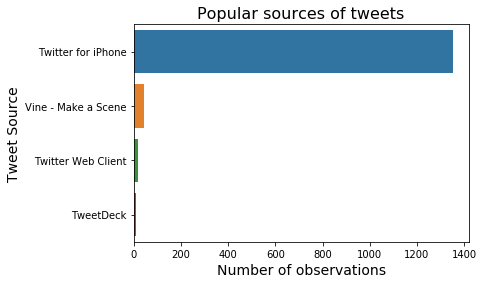

In [824]:
# We use seaborn's countplot to generate the bar chart and provide some Y and X axis titles
sns.countplot(data = df_clean_master, y = 'source', order = sources)
plt.xticks(rotation = 360)
plt.xlabel('Number of observations', fontsize=14)
plt.ylabel('Tweet Source', fontsize=14)
plt.title('Popular sources of tweets',fontsize=16)

### Insight 2 and visual: Correlation between favorite and retweets
#### Definition: We can run a scatterplot to validate the hypothesis that there is a positive correlation between retweet count and favorite tweets

In [826]:
# Code: We use the .corr method to generate a correlation matrix
df_clean_master.corr(method='pearson')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,confidence_top,confidence_2nd,confidence_3rd
tweet_id,1.000000,NaN,NaN,NaN,NaN,0.026480,NaN,0.451992,0.663743,0.190577,0.117526,0.021952,-0.036384
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_numerator,0.026480,NaN,NaN,NaN,NaN,1.000000,NaN,0.014626,0.010033,-0.002419,-0.001572,-0.014889,-0.006624
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.451992,NaN,NaN,NaN,NaN,0.014626,NaN,1.000000,0.926893,0.124348,0.071293,-0.026112,-0.037254
favorite_count,0.663743,NaN,NaN,NaN,NaN,0.010033,NaN,0.926893,1.000000,0.129263,0.088820,-0.018078,-0.041347
img_num,0.190577,NaN,NaN,NaN,NaN,-0.002419,NaN,0.124348,0.129263,1.000000,0.208058,-0.161621,-0.135273


Text(0.5, 1.0, 'Correlation between retweets and favorites')

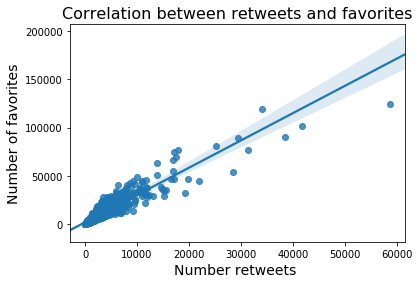

In [831]:
# We use the seaborn regplot to generate a scatterplot with a trend line
sns.regplot(x="retweet_count", y="favorite_count", data=df_clean_master);
plt.xlabel('Number retweets ', fontsize=14)
plt.ylabel('Number of favorites', fontsize=14)
plt.title('Correlation between retweets and favorites',fontsize=16)


### Insight 3 and visual: The most predicted dog breeds
#### Definition: We pull the top 10 dog breeds predicted by the algorithm

In [836]:
# Code: We can filter by using the .value_counts and .head(10) to get the top ten observations of top_prediction:
df_clean_master['top_prediction'].value_counts().head(10)

golden_retriever      93
Labrador_retriever    66
Pembroke              65
Chihuahua             59
pug                   40
chow                  32
toy_poodle            28
Pomeranian            26
Samoyed               23
French_bulldog        22
Name: top_prediction, dtype: int64

In [908]:
# We create a dataframe called top_breeds to have the top 10 most popular dog breeds
top_breeds = df_clean_master['top_prediction'].value_counts().head(10).to_frame()

Text(0.5, 1.0, 'Dog breed')

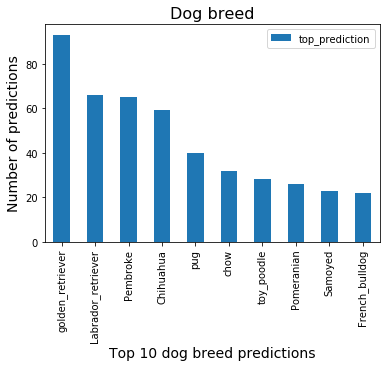

In [915]:
# We can then a simple .plot method with a bar chart option, and customize the Y and X axis titles
top_breeds.plot(kind='bar');
plt.xlabel('Top 10 dog breed predictions', fontsize=14)
plt.ylabel('Number of predictions', fontsize=14)
plt.title('Dog breed',fontsize=16)